In [29]:
import numpy as np
import pandas as pd

In [30]:
data=pd.read_csv("/content/drive/MyDrive/Codsoft/Customer churn/spam.csv", encoding="ISO-8859-1")

In [31]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
222,ham,"Sorry, I'll call later",NaN,NaN,NaN
2947,ham,Nope but i'll b going 2 sch on fri quite early...,NaN,NaN,NaN
738,ham,Wish i were with you now!,NaN,NaN,NaN
2885,ham,No probs hon! How u doinat the mo?,NaN,NaN,NaN
4188,ham,"Well the general price is &lt;#&gt; /oz, let ...",NaN,NaN,NaN


In [32]:
data.shape

(5572, 5)

# Data Cleaning

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [34]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [35]:
data.sample(5)

,v1,v2
3112,ham,"Wat time liao, where still got."
2870,ham,I actually did for the first time in a while. ...
2158,ham,I think you should go the honesty road. Call t...
349,ham,Just checking in on you. Really do miss seeing...
625,ham,"Haha good to hear, I'm officially paid and on ..."


In [36]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
143,ham,I know you are. Can you pls open the back?
4434,spam,Don't b floppy... b snappy & happy! Only gay c...
4288,ham,"Okay, good, no problem, and thanx!"
3724,ham,Nothing spl..wat abt u and whr ru?
627,ham,Yup i thk they r e teacher said that will make...


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [38]:
data['target']=encoder.fit_transform(data['target'])

In [39]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [41]:
data.duplicated().sum()

403

In [42]:
data=data.drop_duplicates(keep='first')

In [43]:
data.duplicated().sum()

0

In [44]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

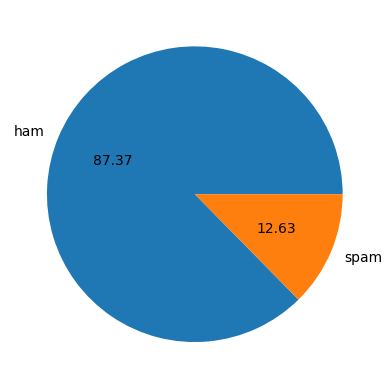

In [45]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [46]:
import nltk

In [47]:
!pip install nltk

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
data['num_c']=data['text'].apply(len)

In [50]:
data['num_w']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [51]:
data['num_s']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [52]:
data[['num_c','num_w','num_s']].describe()

,num_c,num_w,num_s
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_c', ylabel='Count'>

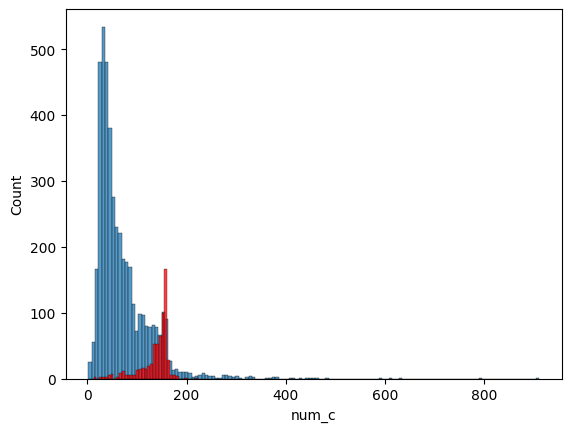

In [53]:
import seaborn as sns
sns.histplot(data[data['target']==0]['num_c'])
sns.histplot(data[data['target']==1]['num_c'],color='red')


<ipython-input-54-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

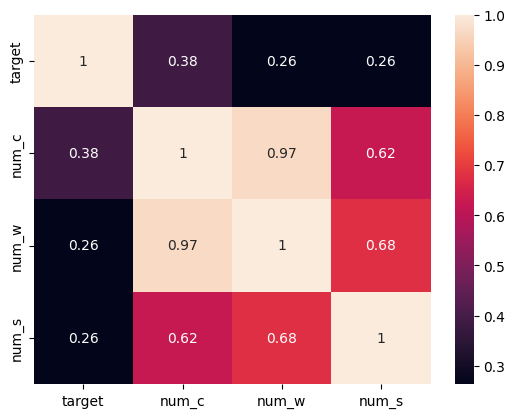

In [54]:
sns.heatmap(data.corr(),annot=True)

# Data Preprocessing

In [62]:
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
def transform(text):
  text=text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [87]:
transform("I am gonn be home soon?")

'gonn home soon'

In [89]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [91]:
data['transformed_text']=data['text'].apply(transform)
data['transformed_text']=data['transformed_text'].astype(str)
data['transformed_text']=data['transformed_text'].str.lower()

In [92]:
data.head()

,target,text,num_c,num_w,num_s,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [93]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='black')

In [94]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

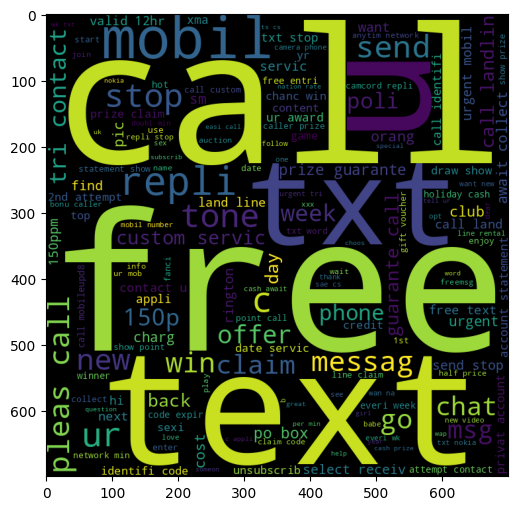

In [95]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [96]:
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

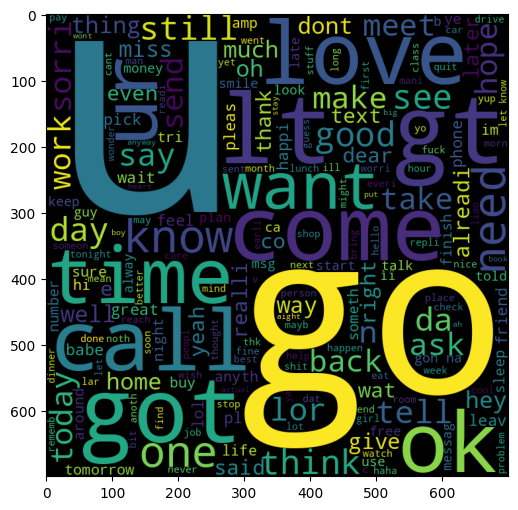

In [97]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [109]:
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


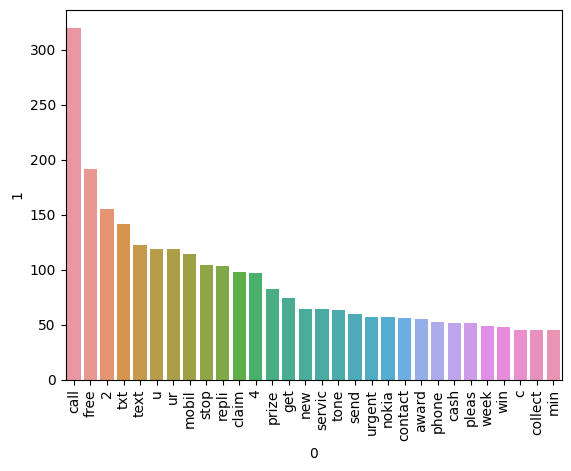

In [113]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],)
plt.xticks(rotation='vertical')
plt.show()

In [114]:
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


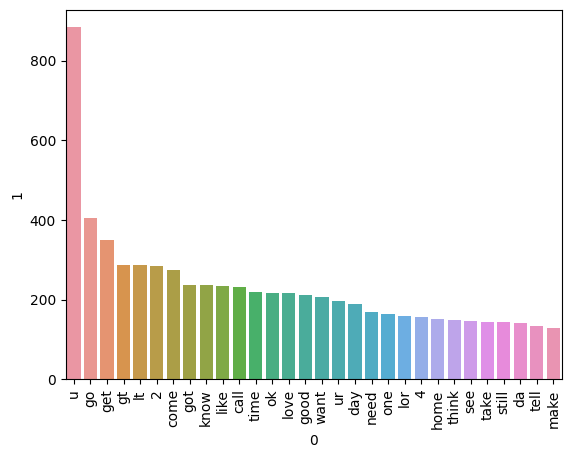

In [115]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [173]:
X=tfidf.fit_transform(data['transformed_text']).toarray()

In [174]:
y=data['target'].values

In [175]:
from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [176]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [177]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [178]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [179]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [180]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# Predicting Custom Results

In [188]:
message=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
transform_msg=transform(str(message))

In [189]:
v=tfidf.transform([transform_msg])

In [190]:
result=mnb.predict(v)[0]

In [192]:
if result==1:
  print('Spam message')
else:
  print("Not a spam message")


Spam message
